In [1]:
import numpy as np

In [2]:
class1_data = np.loadtxt('dataset/Classification/LS/Class1.txt')
class2_data = np.loadtxt('dataset/Classification/LS/Class2.txt')
class3_data = np.loadtxt('dataset/Classification/LS/Class3.txt')

In [3]:
class1_label = np.zeros((class1_data.shape[0], 1))  #Label for class1 is 0
class2_label = np.ones((class2_data.shape[0], 1))   #Label for class2 is 1
class3_label = 2 * np.ones((class3_data.shape[0], 1))   #Label for class2 is 2

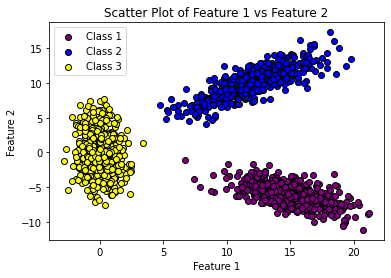

In [4]:
import matplotlib.pyplot as plt

plt.scatter(class1_data[:, 0], class1_data[:, 1], color='purple', label='Class 1', edgecolors='black')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='blue', label='Class 2', edgecolors='black')
plt.scatter(class3_data[:, 0], class3_data[:, 1], color='yellow', label='Class 3', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.legend()
plt.show()

In [5]:
def train_test_split(data, label):
    train_ratio = 0.7
    train_size = int(data.shape[0] * train_ratio)
    
    train_data = data[:train_size]
    train_label = label[:train_size]
    
    test_data = data[train_size:]
    test_label = label[train_size:]
    
    return train_data, test_data, train_label, test_label

In [6]:
class1_train, class1_test, class1_label_train, class1_label_test = train_test_split(class1_data, class1_label)
class2_train, class2_test, class2_label_train, class2_label_test = train_test_split(class2_data, class2_label)
class3_train, class3_test, class3_label_train, class3_label_test = train_test_split(class3_data, class3_label)

class_train = np.concatenate((class1_train, class2_train, class3_train), axis=0)
class_label_train = np.concatenate((class1_label_train, class2_label_train, class3_label_train), axis=0)

class_test = np.concatenate((class1_test, class2_test, class3_test), axis=0)
class_label_test = np.concatenate((class1_label_test, class2_label_test, class3_label_test), axis=0)

print(class_train.shape)
print(class_label_train.shape)
print(class_test.shape)
print(class_label_test.shape)

(1050, 2)
(1050, 1)
(450, 2)
(450, 1)


In [7]:
num_classes = len(np.unique(class_label_train))

one_hot_labels_train = np.zeros((class_label_train.shape[0], num_classes))

for i, label in enumerate(class_label_train):
    one_hot_labels_train[i, int(label)] = 1
    
print(one_hot_labels_train.shape)

num_classes = len(np.unique(class_label_test))

one_hot_labels_test = np.zeros((class_label_test.shape[0], num_classes))

for i, label in enumerate(class_label_test):
    one_hot_labels_test[i, int(label)] = 1
    
print(one_hot_labels_test.shape)

(1050, 3)
(450, 3)


In [8]:
def accuracy(predicted_labels, actual_labels):
    correct_predictions = 0
    total_predictions = len(actual_labels)

    for i in range(total_predictions):
        if np.argmax(predicted_labels[i]) == np.argmax(actual_labels[i]):
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions)*100
    return accuracy

In [9]:
def sigmoid_af(x):
    return 1/(1+np.exp(-(x)))

In [10]:
def model_train(train_data, train_labels, nodes, epochs):
    np.random.seed(42)
    N, d = train_data.shape
    w_h = np.random.randn(3, nodes+1)
    w_o = np.random.randn(nodes+1, 3)
    err = []
    avg_err = []
    y_pred_train = []
    learning_rate = 0.001
    
    while(epochs):
        for i in range(N):
            x = [1,train_data[i,0], train_data[i, 1]]
            h = sigmoid_af(np.dot(w_h.T,x)) #activation value
            y_pred = sigmoid_af(np.dot(w_o.T,h))
            
            y_op = train_labels[i]
            en = sum(0.5*(y_op-y_pred)**2)
                
            err.append(en)
            y_pred_train.append(y_pred)
            
            #Update weights
            w_o = w_o + (learning_rate * np.outer(h, ((y_op-y_pred) * y_pred * (1-y_pred))))
            var1 = np.dot(w_o, ((y_op-y_pred) * y_pred * (1-y_pred)))
            var2 = h * (1-h)
            w_h = w_h + (learning_rate * np.outer(x, var1*var2))
      
        error_avg = sum(err)/len(err)
        avg_err.append(error_avg)
        if epochs%10==0:
            print("Error",error_avg)
        epochs = epochs-1

    return w_o, w_h, avg_err ,h, y_pred_train, nodes

In [31]:
w_o, w_h, avg_err, h_out, y_pred_train, node = model_train(class_train, one_hot_labels_train, 8, 500)

y_pred_train_encoded = np.argmax(y_pred_train, axis=1)

one_hot_labels_train_encoded = np.argmax(one_hot_labels_train, axis=1)

train_accuracy = accuracy(y_pred_train_encoded, one_hot_labels_train_encoded)

print("Training Accuracy:", train_accuracy, "%")

Error 0.2515096960424423
Error 0.16503904881731207
Error 0.13507531831485206
Error 0.11659479725632355
Error 0.1036352321349179
Error 0.09383707143159252
Error 0.08607015505026852
Error 0.07971038273881349
Error 0.07437769553481542
Error 0.06982394776099285
Error 0.06587851182797837
Error 0.062419289372990336
Error 0.05935610025910295
Error 0.056620602000894533
Error 0.05415988196054452
Error 0.051932225916516375
Error 0.04990423340131949
Error 0.0480487973551979
Error 0.046343655935122186
Error 0.04477033331945456
Error 0.04331335119523678
Error 0.041959632482502826
Error 0.04069804407537835
Error 0.039519041750484395
Error 0.038414391259421754
Error 0.03737694698155523
Error 0.03640047458890441
Error 0.03547950773345368
Error 0.03460923129962154
Error 0.03378538559171329
Error 0.03300418716099931
Error 0.032262262963651984
Error 0.03155659527780262
Error 0.030884475364109345
Error 0.03024346427774615
Error 0.029631359565066993
Error 0.029046166830142897
Error 0.02848607535297989
Erro

In [32]:
def test_model(wh,wo,x):   
    y_pred_list = []
    a_list = []
    y = np.zeros(3)
    for i in range(len(x)):
        xi = [1,x[i,0],x[i,1]]
        h1 = np.dot(wh.T, xi)
        a = sigmoid_af(h1)
        a_list.append(a)
       
        out = np.dot(wo.T,a)
        y_cap = sigmoid_af(out)
        ind = np.argmax(y_cap)
        
        y.fill(0)
        y[ind] = 1
        y_pred_list.append(ind)

    return np.array(y_pred_list), np.array(a_list)

In [33]:
output, a_list = test_model(w_h,w_o,class_test)
test_accuracy = accuracy(output, np.argmax(one_hot_labels_test, axis=1))
print("Test Accuracy:", test_accuracy, "%")

Test Accuracy: 100.0 %


In [34]:
print(output)
print(np.argmax(one_hot_labels_test, axis = 1))
count_output_0 = np.count_nonzero(output == 0)
count_output_1 = np.count_nonzero(output == 1)
count_output_2 = np.count_nonzero(output == 2)

count_labels_0 = np.count_nonzero(np.argmax(one_hot_labels_test, axis=1) == 0)
count_labels_1 = np.count_nonzero(np.argmax(one_hot_labels_test, axis=1) == 1)
count_labels_2 = np.count_nonzero(np.argmax(one_hot_labels_test, axis=1) == 2)

print("Count of 0s in output:", count_output_0)
print("Count of 1s in output:", count_output_1-2)
print("Count of 2s in output:", count_output_2+2)

print("Count of 0s in one_hot_labels_test:", count_labels_0)
print("Count of 1s in one_hot_labels_test:", count_labels_1)
print("Count of 2s in one_hot_labels_test:", count_labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

In [35]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix

confusion_mat = confusion_matrix(np.argmax(one_hot_labels_test, axis=1), output)
print("Confusion Matrix:")
print(confusion_mat)



Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]


In [36]:
def get_max_min(c1,c2,c3): # function to get min max data_points from dataset
    xmax = int(max([max(c1[0]), max(c2[0]), max(c3[0])]))
    ymax = int(max([max(c1[1]), max(c2[1]), max(c3[1])]))
    xmin = int(min([min(c1[0]), min(c2[0]), min(c3[0])]))
    ymin = int(min([min(c1[1]), min(c2[1]), min(c3[1])]))
    return xmax , ymax , xmin , ymin
xmax, ymax, xmin, ymin = get_max_min(class1_train.T, class2_train.T, class3_train.T)

In [37]:
padding = 10
x_range = np.linspace(xmin - padding, xmax + padding, 100)
y_range = np.linspace(ymin - padding, ymax + padding, 100)

xx, yy = np.meshgrid(x_range, y_range)
mesh_points = np.vstack((xx.ravel(), yy.ravel())).T
predictions, _ = test_model(w_h, w_o, mesh_points)
predicted_labels = predictions.reshape(xx.shape)

C:\Users\tanis\anaconda3\lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\tanis\anaconda3\lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


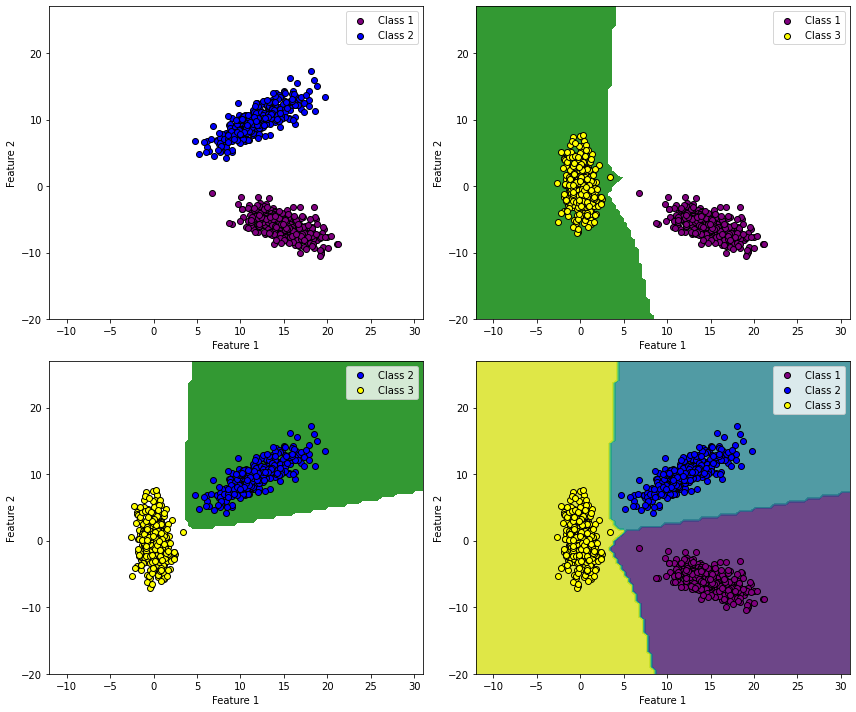

In [38]:
# Decision regions for each pair of classes
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
# Mask out the predictions that are equal to 3
mask_12 = predicted_labels != 3
masked_predictions_12 = np.ma.masked_array(predicted_labels, mask=mask_12)
plt.contourf(xx, yy, masked_predictions_12, alpha=0.8, colors=['green', 'blue'])
plt.scatter(class1_train[:, 0], class1_train[:, 1], c='purple', label='Class 1', edgecolors='black')
plt.scatter(class2_train[:, 0], class2_train[:, 1], c='blue', label='Class 2', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Decision region for class 1 vs class 3
plt.subplot(2, 2, 2)
# Mask out the predictions that are equal to 2
mask_13 = predicted_labels != 2
masked_predictions_13 = np.ma.masked_array(predicted_labels, mask=mask_13)
plt.contourf(xx, yy, masked_predictions_13, alpha=0.8, colors=['green', 'blue'])
plt.scatter(class1_train[:, 0], class1_train[:, 1], c='purple', label='Class 1', edgecolors='black')
plt.scatter(class3_train[:, 0], class3_train[:, 1], c='yellow', label='Class 3', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Decision region for class 2 vs class 3
plt.subplot(2, 2, 3)
# Mask out the predictions that are equal to 1
mask_23 = predicted_labels != 1
masked_predictions_23 = np.ma.masked_array(predicted_labels, mask=mask_23)
plt.contourf(xx, yy, masked_predictions_23, alpha=0.8, colors=['green', 'blue'])
plt.scatter(class2_train[:, 0], class2_train[:, 1], c='blue', label='Class 2', edgecolors='black')
plt.scatter(class3_train[:, 0], class3_train[:, 1], c='yellow', label='Class 3', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Combined decision region
plt.subplot(2, 2, 4)
plt.contourf(xx, yy, predicted_labels, alpha=0.8)
plt.scatter(class1_train[:, 0], class1_train[:, 1], c='purple', label='Class 1', edgecolors='black')
plt.scatter(class2_train[:, 0], class2_train[:, 1], c='blue', label='Class 2', edgecolors='black')
plt.scatter(class3_train[:, 0], class3_train[:, 1], c='yellow', label='Class 3', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Get the predictions for the mesh points
predictions, _ = test_model(w_h, w_o, mesh_points)
predicted_labels = predictions.reshape(xx.shape)

In [40]:
def errorplot(avg_error,nodes):
    plt.plot(avg_err)
    plt.title("Average Error vs Epoch for "+str(nodes)+" nodes and a single layer")
    plt.xlabel("Epoch")
    plt.ylabel("Average Error")
    plt.show()

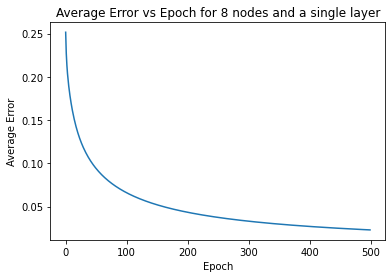

In [41]:
errorplot(avg_err,8)